In [1]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as ny
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import os 
from pandasql import sqldf

# Reading json for business

In [3]:
df_business = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_business.json',lines=True)
df_business.shape

(209393, 14)

In [4]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [5]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [7]:
from pandas import json_normalize

In [8]:
df_business['attributes']

0         {'BusinessAcceptsCreditCards': 'True', 'BikePa...
1         {'GoodForKids': 'True', 'ByAppointmentOnly': '...
2                                                      None
3         {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
4         {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
                                ...                        
209388    {'Ambience': '{'romantic': False, 'intimate': ...
209389    {'RestaurantsPriceRange2': '1', 'BusinessParki...
209390    {'BusinessAcceptsCreditCards': 'True', 'Restau...
209391                                                 None
209392                                                 None
Name: attributes, Length: 209393, dtype: object

# Example to flatten a nested column

In [9]:
df_battributes = df_business['attributes'].apply(pd.Series)

In [10]:
df_battributes.head(5)

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,...,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,True,True,False,"{'garage': False, 'street': False, 'validated'...",False,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,True,NaN,"{'garage': False, 'street': False, 'validated'...",False,4,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_battributes.shape

(209393, 39)

In [12]:
df_battributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   BusinessAcceptsCreditCards  122237 non-null  object
 1   BikeParking                 89765 non-null   object
 2   GoodForKids                 68535 non-null   object
 3   BusinessParking             115215 non-null  object
 4   ByAppointmentOnly           60799 non-null   object
 5   RestaurantsPriceRange2      111288 non-null  object
 6   DogsAllowed                 17539 non-null   object
 7   WiFi                        65331 non-null   object
 8   RestaurantsAttire           49567 non-null   object
 9   RestaurantsTakeOut          66301 non-null   object
 10  NoiseLevel                  46559 non-null   object
 11  RestaurantsReservations     55361 non-null   object
 12  RestaurantsGoodForGroups    56162 non-null   object
 13  HasTV                       5

# Reading file for all checkins

In [13]:
df_checkin = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_checkin.json',lines=True)

In [14]:
df_checkin.shape

(175187, 2)

In [15]:
df_checkin.head(3)

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."


In [16]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


## Aggregating all checkins

In [17]:
df_checkin['checkin_count'] = df_checkin['date'].str.count(',') + 1

## Example of using SQL on DF

In [18]:
from pandasql import sqldf
cc = sqldf("select business_id,checkin_count from df_checkin")

In [19]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   business_id    175187 non-null  object
 1   checkin_count  175187 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


# Reading file for tips (thank you notes)

In [20]:
df_tip = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_tip.json',lines=True)

In [21]:
df_tip.head(10)

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0
7,gxVQZJVeKBUk7jEhSyqv-A,5FIOXmUE3qMviX9GafGH-Q,Get a tsoynami for sure.,2010-01-30 02:03:16,0
8,2hdR7KYAmnCk2FjTnPFsuw,rcaPajgKOJC2vo_l3xa42A,Kelly is an awesome waitress there!,2012-05-29 02:05:56,0
9,DsWg3leomfasGs3j0rOfbQ,hfBrethLHS9iXeBNR8MtzQ,Check out the great assortment of organic & co...,2011-09-30 18:38:47,0


# Aggregating count by business_id

In [22]:
df_tip.groupby(by="business_id").agg('count').filter(regex = 'business_id|text')

,text
business_id,
--1UhMGODdWsrMastO9DZw,3
--6MefnULPED_I942VcFNA,15
--7zmmkVg-IMGaXbuVd0SQ,11
--9QQLMTbFzLJ_oT-ON3Xw,3
--9e1ONYQuAa-CB_Rrw7Tw,176
...,...
zztHqd_3ULxuIS8lkhYdwg,2
zzwaS0xn1MVEPEf0hNLjew,21
zzwhN7x37nyjP0ZM8oiHmw,6


# Reading the Reviews Json
## Since the Json is very big (6 gb), I had to split it into multiple files are then read it to same memory utilization
### Command: split -l 500000 yelp_academic_dataset_review.json review
### I also dropped the actual review column which probably is taking bulk of the space

In [23]:
import socket

is_blake=socket.gethostname()=='BJH-ML-machine'

if(not is_blake):
    df_review = pd.read_json('~/Documents/yelp_datasets/reviewaa',lines=True)
else: 
    df_review = pd.read_json('~/Documents/yelp_datasets/yelp_academic_dataset_review.json',lines=True)

In [24]:
df_review.shape

(8021122, 9)

In [25]:
df_review['review_word_count'] = df_review['text'].str.count(' ')

In [26]:
file_names = ['reviewac','reviewae','reviewag','reviewai','reviewak','reviewam','reviewao','reviewaq','reviewab','reviewad','reviewaf','reviewah','reviewaj','reviewal','reviewan','reviewap']

In [27]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   review_id          object        
 1   user_id            object        
 2   business_id        object        
 3   stars              int64         
 4   useful             int64         
 5   funny              int64         
 6   cool               int64         
 7   text               object        
 8   date               datetime64[ns]
 9   review_word_count  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 612.0+ MB


In [28]:
df_review = df_review.drop(columns = ['text'])

In [29]:
if(not is_blake):
    for file in file_names:
        df_temp = pd.read_json(f'~/Documents/yelp_datasets/{file}',lines=True)
        df_temp['review_word_count'] = df_temp['text'].str.count(' ') + 1
        df_temp.drop(columns = ['text'])
        df_review = pd.concat([df_review,df_temp])

In [30]:
df_review.shape

(8021122, 9)

In [31]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,date,review_word_count
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,2015-04-15 05:21:16,247
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,2013-12-07 03:16:52,274
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,2015-12-05 03:18:11,82


In [32]:
df_review_agg = sqldf("""
select  business_id, 
        sum(case when useful > 0 then 1 else 0 end) as useful_count,
        sum(case when funny > 0 then 1 else 0 end) as funny_count,
        sum(case when cool > 0 then 1 else 0 end) as cool_count,
        avg(review_word_count) review_word_count 
from df_review group by business_id""")

# Below are just some experiments with SQL and Plots on the dataframes we just read.

In [33]:
df_review_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   business_id        209393 non-null  object 
 1   useful_count       209393 non-null  int64  
 2   funny_count        209393 non-null  int64  
 3   cool_count         209393 non-null  int64  
 4   review_word_count  209393 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.0+ MB


In [34]:
df_review_agg.head(10)

,business_id,useful_count,funny_count,cool_count,review_word_count
0,--1UhMGODdWsrMastO9DZw,9,1,11,94.103448
1,--6MefnULPED_I942VcFNA,40,15,16,140.859649
2,--7zmmkVg-IMGaXbuVd0SQ,36,27,33,94.411765
3,--8LPVSo5i0Oo61X01sV9A,3,0,0,88.800000
4,--9QQLMTbFzLJ_oT-ON3Xw,9,2,2,177.882353
5,--9e1ONYQuAa-CB_Rrw7Tw,674,369,442,145.718062
6,--DaPTJW3-tB1vP-PfdTEg,10,3,4,80.686275
7,--DdmeR16TRb3LsjG0ejrQ,5,5,4,438.000000
8,--EF5N7P70J_UYBTPypYlA,9,5,6,101.153846
9,--EX4rRznJrltyn-34Jz1w,2,1,1,89.000000


## Exploding Categories (But keeping it as a separate df since it has a many to many relationship with business)

In [35]:
df_category = df_business[['business_id','categories']]

In [36]:
df_category = df_category.assign(categories=df_category['categories'].str.split(',')).explode('categories')

## Flatten the categories (this takes some time to run) 

In [37]:
#Since this is long running, store the flattened categories as csv and import flatfile on subsequent runs

business_categories_filepath=os.path.expanduser('~')+'/Documents/yelp_datasets/business_categories.csv'
categories_filepath=os.path.expanduser('~')+'/Documents/yelp_datasets/categories.csv'


if(os.path.isfile(business_categories_filepath) & os.path.isfile(categories_filepath)):
    print("Loading existing flattened csv file.")
    df_business_categories = pd.read_csv(business_categories_filepath)
    df_categories = pd.read_csv(categories_filepath)
else: 
    print("Flattening business categories into dataframe. This will take a while.")
    df_categories=df_business['categories'].str.get_dummies(sep=",")
    #Just keep the top 10 most used categories because there are 2000+
    keep_columns=df_categories.sum().sort_values(ascending=False).index[0:10]
    df_business_categories=pd.concat([df_business.drop('categories', 1), 
                                  df_categories[keep_columns]], 
                                 1)
    df_business_categories.to_csv(business_categories_filepath)
    df_categories.to_csv(categories_filepath)

Loading existing flattened csv file.


## Merging Business, checkin and Tip datasets (Not sure what do we need reviews for so didn't merge it)

### Business plus Attributes

In [38]:
df_business_final = pd.merge(df_business_categories,df_battributes,how='left',left_index=True, right_index=True)

### Business plus Checkin

In [39]:
df_business_final = pd.merge(df_business_final,df_checkin[['business_id','checkin_count']],how='left',on='business_id')

### Business plus Tips

In [40]:
df_business_final = pd.merge(df_business_final,df_tip.groupby(by="business_id").agg('count').filter(regex = 'business_id|text'),how='left',on='business_id')

### Business plus Engagement Stats

In [41]:
df_business_final = pd.merge(df_business_final,df_review_agg,how='left',on='business_id')

### Business Parking Flatten

In [42]:
%%time
import json
import pandas as pd

def clean_ugly_json(json_str):
    if json_str is None or json_str == "None" or pd.isnull(json_str):
        return(None)
    #keys need double quotes and values need to be quoted 
    ret=json.loads(json_str.replace("'", '"').\
                   replace("False", '"False"').\
                   replace("True", '"True"').\
                   replace("None", '"None"'))
    return(ret)

def encode_bool(s):
    if s == 'True':
         return True
    elif s == True:
         return True
    elif s == 'False':
         return False
    elif s == False:
         return False
    elif s=='None':
         return None
    elif pd.isnull(s):
         return None
    else:
        print(s)
        raise ValueError

df_biz_parking = df_business_final['BusinessParking'].\
    apply(clean_ugly_json).\
    apply(pd.Series).\
    fillna(False).\
    add_prefix("parking_").\
    applymap(encode_bool)

CPU times: user 41.7 s, sys: 113 ms, total: 41.8 s
Wall time: 41.7 s


In [43]:
df_biz_parking.nunique(dropna=False)

parking_garage       3
parking_street       3
parking_validated    3
parking_lot          3
parking_valet        2
dtype: int64

In [44]:
df_business_final = pd.merge(
                             df_business_final.drop("BusinessParking", axis=1),
                             df_biz_parking,
                             how='left',
                             left_index=True,
                             right_index=True
                            )

# Filter Dataset

Filter down to Arizona and Nevada still contains ~100k records

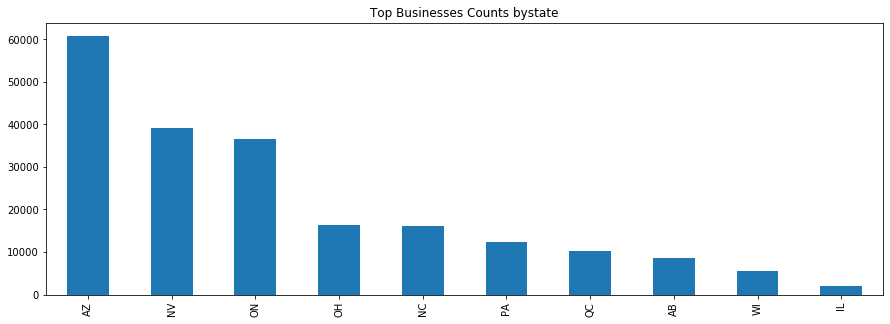

In [45]:
def plot_top(df, col):
    df[col].value_counts().head(10).plot.bar(title='Top Businesses Counts by' + col,figsize=(15,5))
 
plot_top(df_business_final,"state")

In [46]:
df_business_filter=df_business_final.loc[df_business_final['state'].isin(["AZ", "NV"])]
df_business_filter.shape
df_business_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99887 entries, 1 to 209390
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99887 non-null  int64  
 1   business_id                 99887 non-null  object 
 2   name                        99887 non-null  object 
 3   address                     93303 non-null  object 
 4   city                        99886 non-null  object 
 5   state                       99887 non-null  object 
 6   postal_code                 99700 non-null  object 
 7   latitude                    99887 non-null  float64
 8   longitude                   99887 non-null  float64
 9   stars                       99887 non-null  float64
 10  review_count                99887 non-null  int64  
 11  is_open                     99887 non-null  int64  
 12  attributes                  86335 non-null  object 
 13  hours                       80

# Trim Features

['attributes',
 'name',
 'address',
 'hours',
 'business_id',
 'Unnamed: 0',
 ' Restaurants',
 'longitude',
 'latitude']

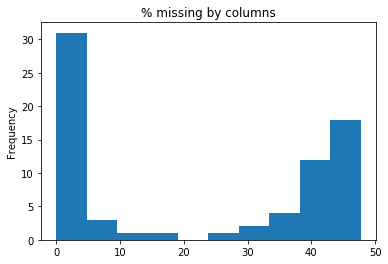

In [47]:
pd.set_option('display.max_columns', 0)

percent_missing = df_business_filter.isnull().sum() * 100 / len(df_business_final)
percent_missing.sort_values(ascending=False).plot(kind="hist", title="% missing by columns")

#Remove any columns with more than 50% missing values
missing_values_cols=percent_missing[percent_missing >50].index

#Manually Remove Values , 
remove_cols=["attributes","name","address", "hours", "business_id", "Unnamed: 0", " Restaurants", "longitude", "latitude"]  

drop_cols=list(missing_values_cols) + remove_cols

#collapse 'Restaurants' and ' Restaurants'
df_business_trim=df_business_filter.\
    assign(Restaurants=df_business_filter[' Restaurants'] + df_business_filter['Restaurants']).\
    drop(columns=drop_cols).\
    rename(columns=lambda x: x.strip()) #remove whitespace from column names

drop_cols

In [48]:
encode_bool_cols=df_business_trim.select_dtypes(include='int').drop(['review_count','useful_count', 'funny_count','cool_count'], axis=1).columns
encode_bool_cols=list(encode_bool_cols)+["parking_street","BusinessAcceptsCreditCards","parking_lot"]

df_business_trim[encode_bool_cols]

,is_open,Shopping,Food,Restaurants,Home Services,Beauty & Spas,Health & Medical,Local Services,Nightlife,Bars,parking_street,BusinessAcceptsCreditCards,parking_lot
1,1,0,0,0,0,0,0,0,0,0,False,NaN,False
3,0,1,0,0,1,0,0,0,0,0,False,True,True
4,1,0,0,0,0,0,0,0,0,0,False,True,False
5,1,0,0,0,0,0,0,0,0,0,False,True,False
6,1,0,0,0,0,0,0,1,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209380,1,0,0,1,0,0,0,0,0,1,False,True,True
209382,1,0,0,0,0,0,0,0,0,0,False,NaN,False
209384,1,0,0,0,1,0,0,0,0,0,False,True,False
209386,1,0,0,0,1,0,0,1,0,0,False,True,False


## Transformation

In [49]:
def encode_null(s):
    if s=='None':
         return None
    elif pd.isnull(s):
         return None
    else:
        return s

#encode string values of null
restaurant_price_encoded=df_business_trim.RestaurantsPriceRange2.apply(encode_null).astype("float")

# #encode boolean columns 
df_boolean=df_business_trim[encode_bool_cols].applymap(encode_bool).astype('bool')

df_business_transform = df_business_trim.\
    assign(zip3=df_business_trim.postal_code.apply(lambda x:str(x)[0:3])).\
    drop("postal_code", axis=1).\
    assign(city_state=df_business_trim["city"]+"_"+df_business_trim["state"]).\
    drop("city", axis=1).\
    drop(encode_bool_cols, axis=1).\
    merge(
        df_boolean,
        how='left',
        left_index=True,
        right_index=True
    ).\
    assign(RestaurantsPriceRange2=restaurant_price_encoded)

#transform stars to categorical 0,1,2 (i.e. low,medium,high)
df_business_transform['rating_category'] = 0 #for less tha 2.5
df_business_transform.loc[(df_business_transform['stars'] > 2.5) & (df_business_transform['stars'] <= 3.9), 'rating_category'] = 1 #between 2.6 and 3.9
df_business_transform.loc[(df_business_transform['stars'] > 3.9), 'rating_category'] = 2 #greater  4 
df_business_transform['rating_category']=df_business_transform['rating_category'].astype(int) 
df_business_transform.head()

,state,stars,review_count,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,checkin_count,text,useful_count,funny_count,cool_count,review_word_count,parking_garage,parking_validated,parking_valet,zip3,city_state,is_open,Shopping,Food,Restaurants,Home Services,Beauty & Spas,Health & Medical,Local Services,Nightlife,Bars,parking_street,BusinessAcceptsCreditCards,parking_lot,rating_category
1,AZ,5.0,4,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,4,2,1,121.000000,False,False,False,852,Scottsdale_AZ,True,False,False,False,False,False,False,False,False,False,False,False,False,2
3,NV,2.5,3,True,NaN,False,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1,0,0,26.666667,False,False,False,890,North Las Vegas_NV,False,True,False,False,True,False,False,False,False,False,False,True,True,0
4,AZ,4.5,26,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11,6,3,86.962963,False,False,False,852,Mesa_AZ,True,False,False,False,False,False,False,False,False,False,False,True,False,2
5,AZ,4.5,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,4.0,25,6,2,81.690476,False,False,False,852,Gilbert_AZ,True,False,False,False,False,False,False,False,False,False,False,True,False,2
6,NV,3.5,81,True,NaN,NaN,1.0,NaN,u'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.0,22.0,50,18,22,111.097561,False,False,False,891,Las Vegas_NV,True,False,False,False,False,False,False,True,False,False,False,True,True,1


In [50]:
categorical_cols=["Beauty & Spas","Bars","Nightlife","Local Services","Health & Medical","Home Services","is_open","Shopping","Food","Restaurants","BusinessAcceptsCreditCards","parking_valet","parking_lot","parking_garage","parking_street","parking_validated","RestaurantsPriceRange2","state","city_state","zip3", "rating_category"]

df_business_hot=df_business_transform
for col in categorical_cols:
    print(col)
    dummies=pd.get_dummies(df_business_hot[col], dummy_na=True, prefix=col)
    df_business_hot=df_business_hot.\
        drop(col,axis=1).\
    merge(
        dummies,
        how='left',
        left_index=True,
        right_index=True
        )

Beauty & Spas
Bars
Nightlife
Local Services
Health & Medical
Home Services
is_open
Shopping
Food
Restaurants
BusinessAcceptsCreditCards
parking_valet
parking_lot
parking_garage
parking_street
parking_validated
RestaurantsPriceRange2
state
city_state
zip3
rating_category


In [51]:
df_business_hot.head()

,stars,review_count,BikeParking,GoodForKids,ByAppointmentOnly,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,checkin_count,text,...,zip3_850,zip3_851,zip3_852,zip3_853,zip3_854,zip3_855,zip3_857,zip3_858,zip3_859,zip3_860,zip3_863,zip3_864,zip3_871,zip3_880,zip3_881,zip3_889,zip3_890,zip3_891,zip3_894,zip3_895,zip3_900,zip3_910,zip3_911,zip3_912,zip3_920,zip3_925,zip3_928,zip3_930,zip3_940,zip3_952,zip3_953,zip3_959,zip3_967,zip3_981,zip3_nan,zip3_nan,rating_category_0.0,rating_category_1.0,rating_category_2.0,rating_category_nan
1,5.0,4,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2.5,3,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.5,26,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,4.5,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,4.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,3.5,81,True,NaN,NaN,NaN,u'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.0,22.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Feature Selection

In [52]:
%%time
import numpy as np
from sklearn.linear_model import LassoCV

y=df_business_hot["stars"]
X=df_business_hot.select_dtypes(include=np.number).drop(["stars","rating_category_0.0","rating_category_1.0","rating_category_2.0","rating_category_nan"],axis=1).fillna(0)

lasso = LassoCV()
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef > 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 305 variables
CPU times: user 55 s, sys: 30.5 s, total: 1min 25s
Wall time: 6.44 s


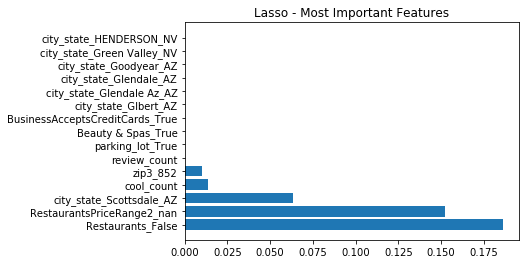

In [53]:
lasso_top_15=(coef).sort_values(ascending=False).head(15)
plt.barh(y=lasso_top_15.index, width=lasso_top_15.values)
plt.title("Lasso - Most Important Features")
plt.show()

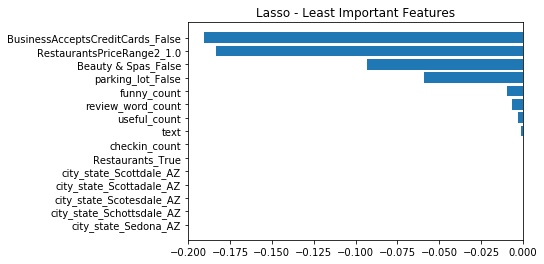

In [55]:
lasso_bottom_15=(coef).sort_values(ascending=False).tail(15)
plt.barh(y=lasso_bottom_15.index, width=lasso_bottom_15.values)
plt.title("Lasso - Least Important Features")
plt.show()

## Tree-based feature selection

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#using the non-one hot encoded rating_category 
y2=df_business_transform["rating_category"]
X2=df_business_hot.select_dtypes(include=np.number).drop(["stars","rating_category_0.0","rating_category_1.0","rating_category_2.0","rating_category_nan"],axis=1).fillna(0)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X2, y2)
clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X2)
X_new.shape

coef2 = pd.Series(clf.feature_importances_, index = X2.columns)
print("Tree-based picked " + str(sum(coef2 > 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

Tree-based picked 308 variables and eliminated the other 16 variables


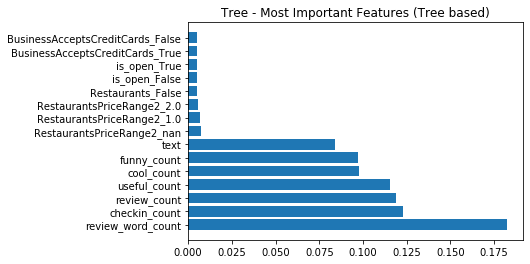

In [58]:
tree_top_15=(coef2).sort_values(ascending=False).head(15)
plt.barh(y=tree_top_15.index, width=tree_top_15.values)
plt.title("Tree - Most Important Features (Tree based)")
plt.show()

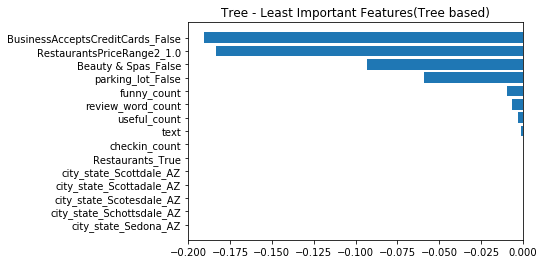

In [59]:
tree_bottom_15=(coef).sort_values(ascending=False).tail(15)
plt.barh(y=tree_bottom_15.index, width=tree_bottom_15.values)
plt.title("Tree - Least Important Features(Tree based)")
plt.show()

In [60]:
# Final Variables Selection
lasso_top_15

Restaurants_False                  1.864721e-01
RestaurantsPriceRange2_nan         1.524233e-01
city_state_Scottsdale_AZ           6.357205e-02
cool_count                         1.377015e-02
zip3_852                           1.017407e-02
review_count                       2.843936e-04
parking_lot_True                   1.991703e-15
Beauty & Spas_True                 2.304600e-16
BusinessAcceptsCreditCards_True    8.278197e-17
city_state_Glbert_AZ               0.000000e+00
city_state_Glendale Az_AZ         -0.000000e+00
city_state_Glendale_AZ            -0.000000e+00
city_state_Goodyear_AZ            -0.000000e+00
city_state_Green Valley_NV         0.000000e+00
city_state_HENDERSON_NV            0.000000e+00
dtype: float64

In [61]:
tree_top_15

review_word_count                   0.182303
checkin_count                       0.122887
review_count                        0.118887
useful_count                        0.115300
cool_count                          0.097969
funny_count                         0.097073
text                                0.083841
RestaurantsPriceRange2_nan          0.007183
RestaurantsPriceRange2_1.0          0.006772
RestaurantsPriceRange2_2.0          0.005891
Restaurants_False                   0.005356
is_open_False                       0.005310
is_open_True                        0.005298
BusinessAcceptsCreditCards_True     0.005079
BusinessAcceptsCreditCards_False    0.005022
dtype: float64

In [110]:
def dedup_list(x):
  return list(dict.fromkeys(x))

response_vars=["stars","rating_category"]
lasso_important_vars=["RestaurantsPriceRange2","city_state","BusinessAcceptsCreditCards","Beauty & Spas","parking_lot","review_count","zip3","cool_count","Restaurants"]
tree_important_vars=["review_word_count","checkin_count","review_count","useful_count","cool_count","funny_count","text","RestaurantsPriceRange2","Restaurants","is_open","BusinessAcceptsCreditCards"]
eda_cols=dedup_list(response_vars+lasso_important_vars+tree_important_vars)

df_business_eda=df_business_transform[eda_cols]

df_business_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99887 entries, 1 to 209390
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       99887 non-null  float64
 1   rating_category             99887 non-null  int64  
 2   RestaurantsPriceRange2      44756 non-null  float64
 3   city_state                  99886 non-null  object 
 4   BusinessAcceptsCreditCards  99887 non-null  bool   
 5   Beauty & Spas               99887 non-null  bool   
 6   parking_lot                 99887 non-null  bool   
 7   review_count                99887 non-null  int64  
 8   zip3                        99887 non-null  object 
 9   cool_count                  99887 non-null  int64  
 10  Restaurants                 99887 non-null  bool   
 11  review_word_count           99887 non-null  float64
 12  checkin_count               82378 non-null  float64
 13  useful_count                99

# Business Understanding 
  Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).  

  The data we will be using for analysis was extracted from Yelp, an online tool where users give ratings and write reviews about businesses and services on Yelp. Potential customers who are also Yelp users use the ratings and reviews to evaluate a given business or services before making a choice. This dataset was collected as part of “Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In total, there are: 5,200,000 user reviews, Information on 174,000 businesses and the data spans 11 metropolitan areas[1]” 
  
  Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
  
  The aim of this analysis is to determine how the customer’s choice to engage with a business or service is influenced by the ratings in yelp for a particular business. We predict that a business in a specific location and a given category, is likely to have high customer engagement based on its ratings. To develop our model, we will be looking at the data for a specific business in a given location and analyze how many customers checked in and left Thank you notes. Initial inspection of the data revealed that Yelp data is in JSON format and some columns are nested which forces us to flatten the nested columns before we begin our analysis. We imported the business, checking and thank you notes JSON files and flattened them in pandas then applied the feature selection. The text on the reviews is so around 6GB so we will not include that data as there’s no use for the actual review text. We will also not be using specific customer information such as name, id as that will not be useful in our analysis. Once we have our dataset, we will split it into separate training and test subsets then apply our algorithm on the training before using it on the test dataset.  
The scenario where customer engagement prediction will be useful is during the sales process, the Yelp salesperson can use the analysis to show customers how their business rating can influence customers in the area to make a choice on whether or not they will like to engage the business. 


How would you measure the effectiveness of a good prediction algorithm? Be specific.

To assess predictive performance, we will randomly divide data using stratified sampling, into sets for the training data set and sets for the test data set. We will fit logistic LASSO regression using the training data set only and predict user engagement of the test data using the fitted model. The reason we will use Logistic LASSO regression is because we are predicting whether the customer will engage in the business, the outcome is denoted by Y or X. For logistic LASSO regression, we will use cross-validation to select lambda(λ). We will then calculate the misclassification error and the area under the (AUC) for test data as a way to measures the predictive performance of the fitted model. 

  A good prediction algorithm would be...
  Identify what you want to predict (1 or 2)
  Regression: RMSE,...
  Classification: accurary, precision, f1
  ten-fold cross-validation (if there are a million records)
  
 

# Data Meaning Type
  Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

  pd.df.info()
  pd.df.describe()
  summarize the types of columns

# Data Quality
  Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

  boxplots for outliers (don't need to correct) <- do we think it's bad data? / Delete
  missing data <- what's the imputation plan? / Delete

# Simple Statistics [Blake]
  Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

  df.describe()

In [112]:
print (df_business_eda.sort_index(axis=1).dtypes.sort_values())

Beauty & Spas                    bool
parking_lot                      bool
is_open                          bool
BusinessAcceptsCreditCards       bool
Restaurants                      bool
cool_count                      int64
funny_count                     int64
useful_count                    int64
rating_category                 int64
review_count                    int64
RestaurantsPriceRange2        float64
checkin_count                 float64
review_word_count             float64
stars                         float64
text                          float64
city_state                     object
zip3                           object
dtype: object


# Visualize Attributes [Blake]
  Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

  every visualization needs text explaining to the viewer what the visualization means 

In [114]:
def plot_top(df, col):
    df[col].value_counts().head(10).plot.bar(title='Top Businesses Counts by' + col,figsize=(15,5))

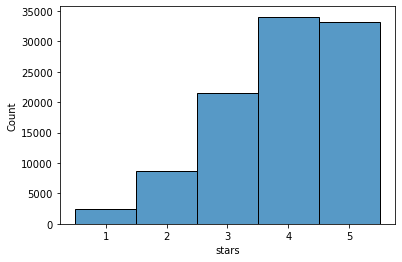

In [234]:
sb.histplot(df_business_eda.stars, binwidth=1,discrete=True)

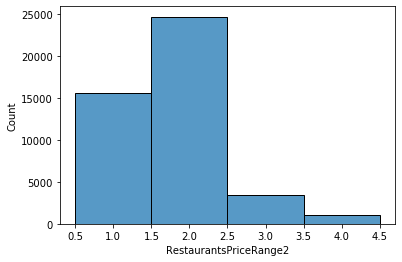

In [240]:
pl=sb.histplot(df_business_eda.RestaurantsPriceRange2, binwidth=1,discrete=True,ma)

# cool_count                      int64
# funny_count                     int64
# useful_count                    int64
# review_count                    int64
# checkin_count                 float64
# review_word_count             float64
# text                          float64

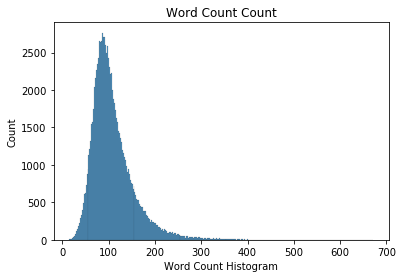

In [291]:
fig=sb.histplot(df_business_eda.review_word_count)
plt.xlabel("Word Count Histogram")
plt.ylabel("Count")
plt.title("Word Count Count") # You can comment this line out if you don't need title
plt.show(fig)

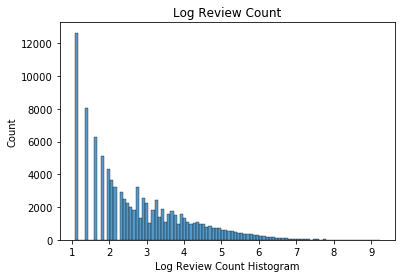

In [290]:
fig=sb.histplot(np.log(df_business_eda.review_count))
plt.xlabel("Log Review Count Histogram")
plt.ylabel("Count")
plt.title("Log Review Count") # You can comment this line out if you don't need title
plt.show(fig)
# cool_count                      int64
# funny_count                     int64
# useful_count                    int64
# review_count                    int64
# checkin_count                 float64
# review_word_count             float64
# text                          float64

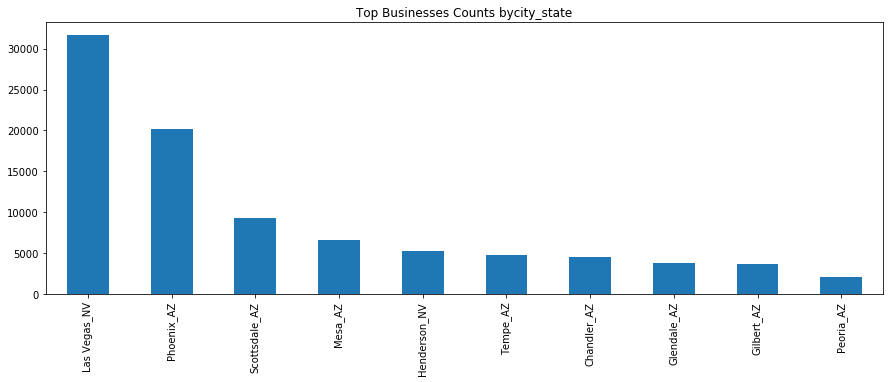

In [127]:
plot_top(df_business_eda,"city_state")

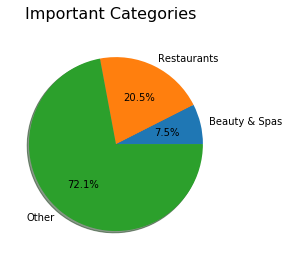

In [217]:
beauty_or_restaurants=df_business_eda["Beauty & Spas"]|df_business_eda["Restaurants"]

category_counts={
    "Beauty & Spas":(df_business_eda["Beauty & Spas"]==True).sum(),  
    "Restaurants":(df_business_eda["Restaurants"]==True).sum(),
    "Other":np.size(beauty_or_restaurants) - np.count_nonzero(beauty_or_restaurants)
}

plt.suptitle('Important Categories', fontsize=16)
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', shadow=True)
plt.show()

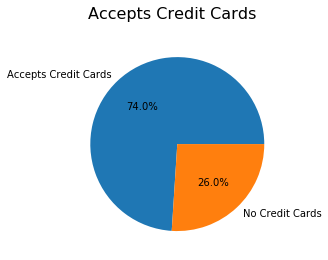

In [233]:
credit_counts={
    "Accepts Credit Cards":(df_business_eda["BusinessAcceptsCreditCards"]==True).sum(),  
    "No Credit Cards":(df_business_eda["BusinessAcceptsCreditCards"]==False).sum()
}

plt.suptitle('Accepts Credit Cards', fontsize=16)
plt.pie(credit_counts.values(), labels=credit_counts.keys(), autopct='%1.1f%%')
plt.show()

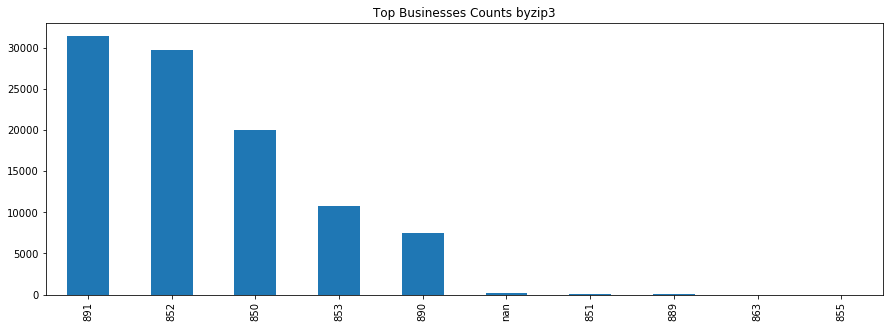

In [132]:
plot_top(df_business_eda,'zip3')

# Explore Joint Attributes [Blake]
  Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

  pair-plot (just compare two features)

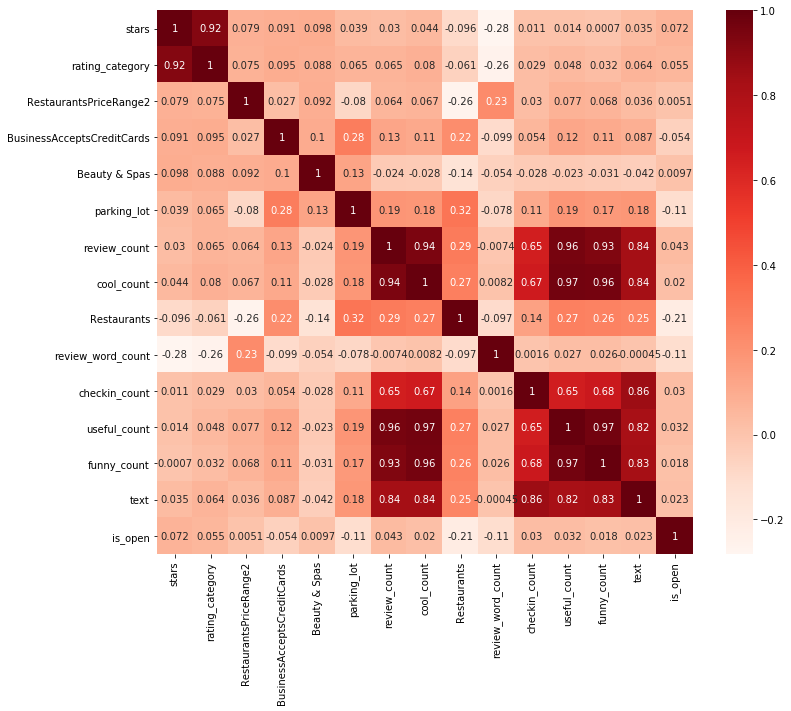

In [292]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_business_eda.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

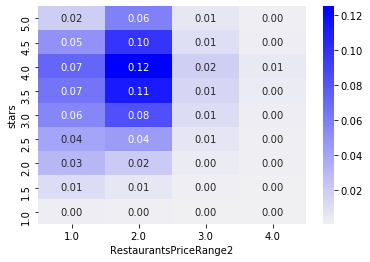

In [327]:
def visualize_crosstab(df, col1,col2, normalize='all'):
    ct=pd.crosstab(df[col1],
            df[col2],
            normalize = normalize # convert absolute to row proportions
           )
    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    #stacked.lot == "True"
    # plot grouped bar chart
    sb.barplot(x=stacked[col1], y=stacked.value, hue=stacked[col2])

def crosstab_heatmap(df, col1, col2, normalize='all'):
    ct=pd.crosstab(
        df[col1],
        df[col2],
        normalize=normalize).round(3)
    
    ct=ct.sort_values([col1], ascending=False)
    sb.heatmap(ct, annot=True, fmt = '.2f', cmap=sb.color_palette("light:b", as_cmap=True))
    

crosstab_heatmap(df_business_eda, "stars","RestaurantsPriceRange2",normalize="all")

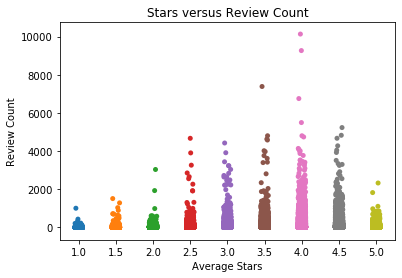

In [310]:
# cool_count                      int64
# funny_count                     int64
# useful_count                    int64
# review_count                    int64
# checkin_count                 float64
# review_word_count             float64
# text                          float64

fig=sb.stripplot(data=df_business_eda, x="stars", y="review_count")

plt.xlabel("Average Stars")
plt.ylabel("Review Count")
plt.title("Stars versus Review Count") # You can comment this line out if you don't need title
plt.show(fig)

None

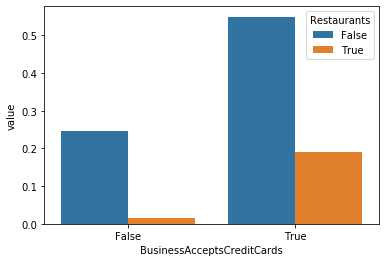

In [315]:
display(visualize_crosstab(df_business_eda,"BusinessAcceptsCreditCards", "Restaurants"))

None

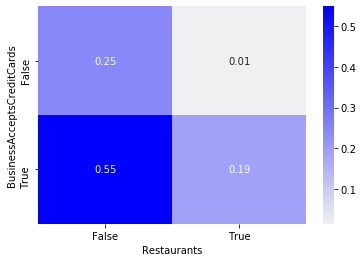

In [316]:
display(crosstab_heatmap(df_business_eda,"BusinessAcceptsCreditCards", "Restaurants"))

None

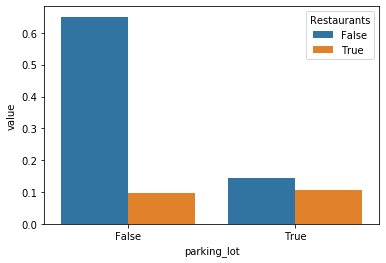

In [317]:
display(visualize_crosstab(df_business_eda,"parking_lot", "Restaurants"))

None

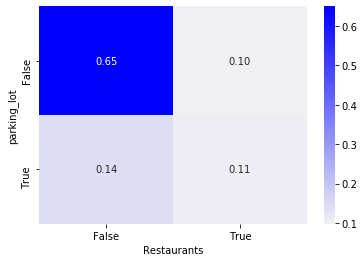

In [318]:
display(crosstab_heatmap(df_business_eda,"parking_lot", "Restaurants"))

None

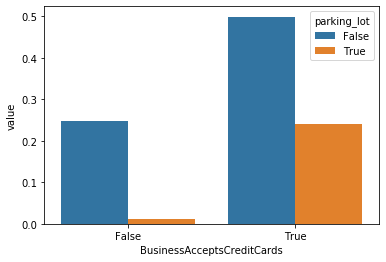

In [320]:
display(visualize_crosstab(df_business_eda, "BusinessAcceptsCreditCards","parking_lot"))

# Explore Attributes and Class
  Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

  compare to the response variable

None

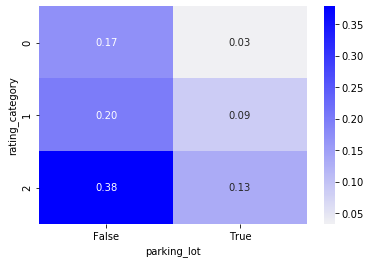

In [323]:
display(crosstab_heatmap(df_business_eda, "rating_category","parking_lot"))

# New Features
  Are there other features that could be added to the data or created from existing features? Which ones?

  at least 4, bin fields, for example age-income be explicit to catch retirement / too young to work

  We can also say we can pull in data from another source. It has to exist.

# Exceptional Work
  You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.